In [37]:
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# CSV IMPORTER

In [6]:
dragcsvdir = 'C:\\Users\\Harrison\\OneDrive - University of Cincinnati\\Year 5\\Aero Lab\\Lab Work\\Custom Lab\\320k Reynolds - Stoelting\\Reports\\Drag'
Cdcsvdir = 'C:\\Users\\Harrison\\OneDrive - University of Cincinnati\\Year 5\\Aero Lab\\Lab Work\\Custom Lab\\320k Reynolds - Stoelting\\Reports\\Drag Coefficient'
liftcsvdir = 'C:\\Users\\Harrison\\OneDrive - University of Cincinnati\\Year 5\\Aero Lab\\Lab Work\\Custom Lab\\320k Reynolds - Stoelting\\Reports\\Lift'
Clcsvdir = 'C:\\Users\\Harrison\\OneDrive - University of Cincinnati\\Year 5\\Aero Lab\\Lab Work\\Custom Lab\\320k Reynolds - Stoelting\\Reports\\Lift Coefficient'
LoDcsvdir = 'C:\\Users\\Harrison\\OneDrive - University of Cincinnati\\Year 5\\Aero Lab\\Lab Work\\Custom Lab\\320k Reynolds - Stoelting\\Reports\\LoD'

# get all the csv files in that directory (assuming they have the extension .csv)
dragcsvfiles = glob.glob(os.path.join(dragcsvdir, '*.csv'))
Cdcsvfiles = glob.glob(os.path.join(Cdcsvdir, '*.csv'))
liftcsvfiles = glob.glob(os.path.join(liftcsvdir, '*.csv'))
Clcsvfiles = glob.glob(os.path.join(Clcsvdir, '*.csv'))
LoDcsvfiles = glob.glob(os.path.join(LoDcsvdir, '*.csv'))

# loop through the files and read them in with pandas
dragdataframes = []  # a list to hold all the individual pandas DataFrames
Cddataframes = []
Liftdataframes = []
Cldataframes = []
LoDdataframes = []

#using individual for loops so it is easier to comment out whichever set of files is not needed
for csvfile in dragcsvfiles:
    df = pd.read_csv(csvfile)
    dragdataframes.append(df)

print("Drag Complete")

for csvfile in Cdcsvfiles:
    df = pd.read_csv(csvfile)
    Cddataframes.append(df)

print("Cd Complete")

for csvfile in liftcsvfiles:
    df = pd.read_csv(csvfile)
    Liftdataframes.append(df)

print("Lift Complete")

for csvfile in Clcsvfiles:
    df = pd.read_csv(csvfile)
    Cldataframes.append(df)

print("Cl Complete")

for csvfile in LoDcsvfiles:
    df = pd.read_csv(csvfile)
    LoDdataframes.append(df)

print("LoD Complete")

Drag Complete
Cd Complete
Lift Complete
Cl Complete
LoD Complete


## Breaking into arrays with relevant data

In [19]:
#Creating arrays that have number of rows = # of files and columns = # of rows in csv
Drags = np.zeros((len(dragdataframes), len(dragdataframes[0])))
CDs = np.zeros((len(Cddataframes), len(Cddataframes[0])))
Lifts = np.zeros((len(Liftdataframes), len(Liftdataframes[0])))
CLs = np.zeros((len(Cldataframes), len(Cldataframes[0])))
LoDs = np.zeros((len(LoDdataframes), len(LoDdataframes[0])))

#populating the arrays with the useful data
#Drag
for i in range(len(dragdataframes)):
    temp_frame = dragdataframes[i]
    for j in range(len(dragdataframes[0])):
        Drags[i,j] = temp_frame.iloc[j,1]

#CD
for i in range(len(Cddataframes)):
    temp_frame = Cddataframes[i]
    for j in range(len(Cddataframes[0])):
        CDs[i,j] = temp_frame.iloc[j,1]

#Lift
for i in range(len(Liftdataframes)):
    temp_frame = Liftdataframes[i]
    for j in range(len(Liftdataframes[0])):
        Lifts[i,j] = temp_frame.iloc[j,1]

#CL
for i in range(len(Cldataframes)):
    temp_frame = Cldataframes[i]
    for j in range(len(Cldataframes[0])):
        CLs[i,j] = temp_frame.iloc[j,1]

#LoD
for i in range(len(LoDdataframes)):
    temp_frame = LoDdataframes[i]
    for j in range(len(LoDdataframes[0])):
        LoDs[i,j] = temp_frame.iloc[j,1]


## Averaging the values after the initial start (after the 700th iteration)

In [36]:
#creating a pandas frame to store the averaged values
test_num = len(dragdataframes) #number of tests ran based off the number of files
init_data = {'Drag (N)': [0], 'C_D': [0], 'Lift (N)': [0], "C_L": [0], "L/D": [0]}
avg_df = pd.DataFrame(init_data)

#Finding the average for each AoA (row) of the column
for j in range(len(avg_df)):
    for i in range(test_num):
        avg = np.average(Drags[i,700:])
        avg_df.at[i, "Drag (N)"] = avg

        avg = np.average(CDs[i,700:])
        avg_df.at[i, "C_D"] = avg

        avg = np.average(Lifts[i,700:])
        avg_df.at[i, "Lift (N)"] = avg

        avg = np.average(CLs[i,700:])
        avg_df.at[i, "C_L"] = avg

        avg = np.average(LoDs[i,700:])
        avg_df.at[i, "L/D"] = avg

print(avg_df)

     Drag (N)       C_D    Lift (N)       C_L        L/D
0    4.874104  0.013008  183.637346  0.490085  37.676124
1   12.077406  0.032232  593.078861  1.582788  49.106477
2   13.340702  0.035603  624.682902  1.667132  46.825342
3   14.913393  0.039800  653.123685  1.743034  43.794447
4   16.765502  0.044743  676.155324  1.804500  40.330186
5   19.027601  0.050780  693.531036  1.850871  36.448820
6   21.890329  0.058420  703.030204  1.876222  32.118256
7   26.500245  0.070723  717.279686  1.914232  27.077741
8    5.046249  0.013467  228.141527  0.608856  45.210124
9    5.539145  0.014783  272.285303  0.726666  49.156561
10   5.846609  0.015603  316.036568  0.843427  54.054675
11   6.569646  0.017533  359.053771  0.958230  54.653443
12   7.065230  0.018855  401.291034  1.070951  56.798013
13   8.030689  0.021432  442.607253  1.181215  55.114483
14   8.711946  0.023250  482.843595  1.288596  55.423165
15   9.547820  0.022722  521.633864  1.392118  54.633816
16  10.418337  0.027804  558.62

<AxesSubplot:xlabel='C_D'>

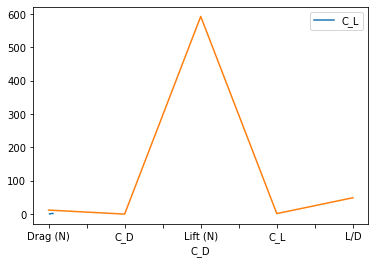